In [19]:
# This Notebook loads a dataset to memory, calculates NBR2, and plots the results, using a cloud mask.

In [ ]:
import datacube
from datacube.api.query import Query
from datacube.storage.masking import mask_invalid_data

dc = datacube.Datacube()

In [3]:
# Enter the bands to retrieve
b1 = 5
b2 = 7

nwt = False
vi = False


In [6]:
# Prepare the DB query

def add1(x):
    return x+1

b1, b2 = map(add1,[b1, b2])


if nwt :
    lat = (62.3768, 63.3062)
    lon = (-114.7038, -112.3989)
elif vi :
    lat = (60.5044, 63.8342)
    lon = (-116.6982, -109.6388)
else :
    lat = (45.4499, 46.6034)
    lon = (-78.4944, -76.7130)    

    
LC08_Bands = ['coastal_aerosol', 'blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'panchromatic', 'cirrus', 'lwir1', 'lwir2', 'quality']


query = { 
    'product' : 'LC08_scene'
    #, 'time' : ('2014','2015')
    , 'latitude' : lat
    , 'longitude' : lon
    , 'measurements' : [ LC08_Bands[b1], LC08_Bands[b2] ]
    , 'resolution' : (-0.0025, 0.0025)
}

In [7]:
# Explore datacube records to locate datasets of interest
dc.find_datasets(**query)

[Dataset <id=618fd894-abaf-540d-bf50-f00c75974d49 type=LC08_scene location=/data/datacube/in/landsat/LC08_L1TP_017028_20130809_20170309_01_T1/metadata.yaml>,
 Dataset <id=c07c4053-faca-5160-9e16-95f742cccae6 type=LC08_scene location=/data/datacube/in/landsat/LC08_L1TP_017028_20130926_20170308_01_T1/metadata.yaml>,
 Dataset <id=a3c3eb5a-a700-500b-985e-2f999b3eadb8 type=LC08_scene location=/data/datacube/in/landsat/LC08_L1TP_017028_20140711_20170304_01_T1/metadata.yaml>,
 Dataset <id=f208f14e-7e10-576a-a594-6d761d842d7e type=LC08_scene location=/data/datacube/in/landsat/LC08_L1TP_017028_20150916_20170225_01_T1/metadata.yaml>,
 Dataset <id=c41be1b9-f985-54c6-a6f9-353af4fb3840 type=LC08_scene location=/data/datacube/in/landsat/LC08_L1TP_017028_20170820_20170826_01_T1/metadata.yaml>]

In [8]:
# Query the datacube and load datasets to memory
data = dc.load(**query)

In [9]:
# Isolate all valid data in the the two bands of interest
band1 = mask_invalid_data(data)

band1 = data.data_vars[LC08_Bands[b1]].where(data.data_vars[LC08_Bands[b1]] != data.data_vars[LC08_Bands[b1]].attrs['nodata'])
band2 = data.data_vars[LC08_Bands[b2]].where(data.data_vars[LC08_Bands[b2]] != data.data_vars[LC08_Bands[b2]].attrs['nodata'])

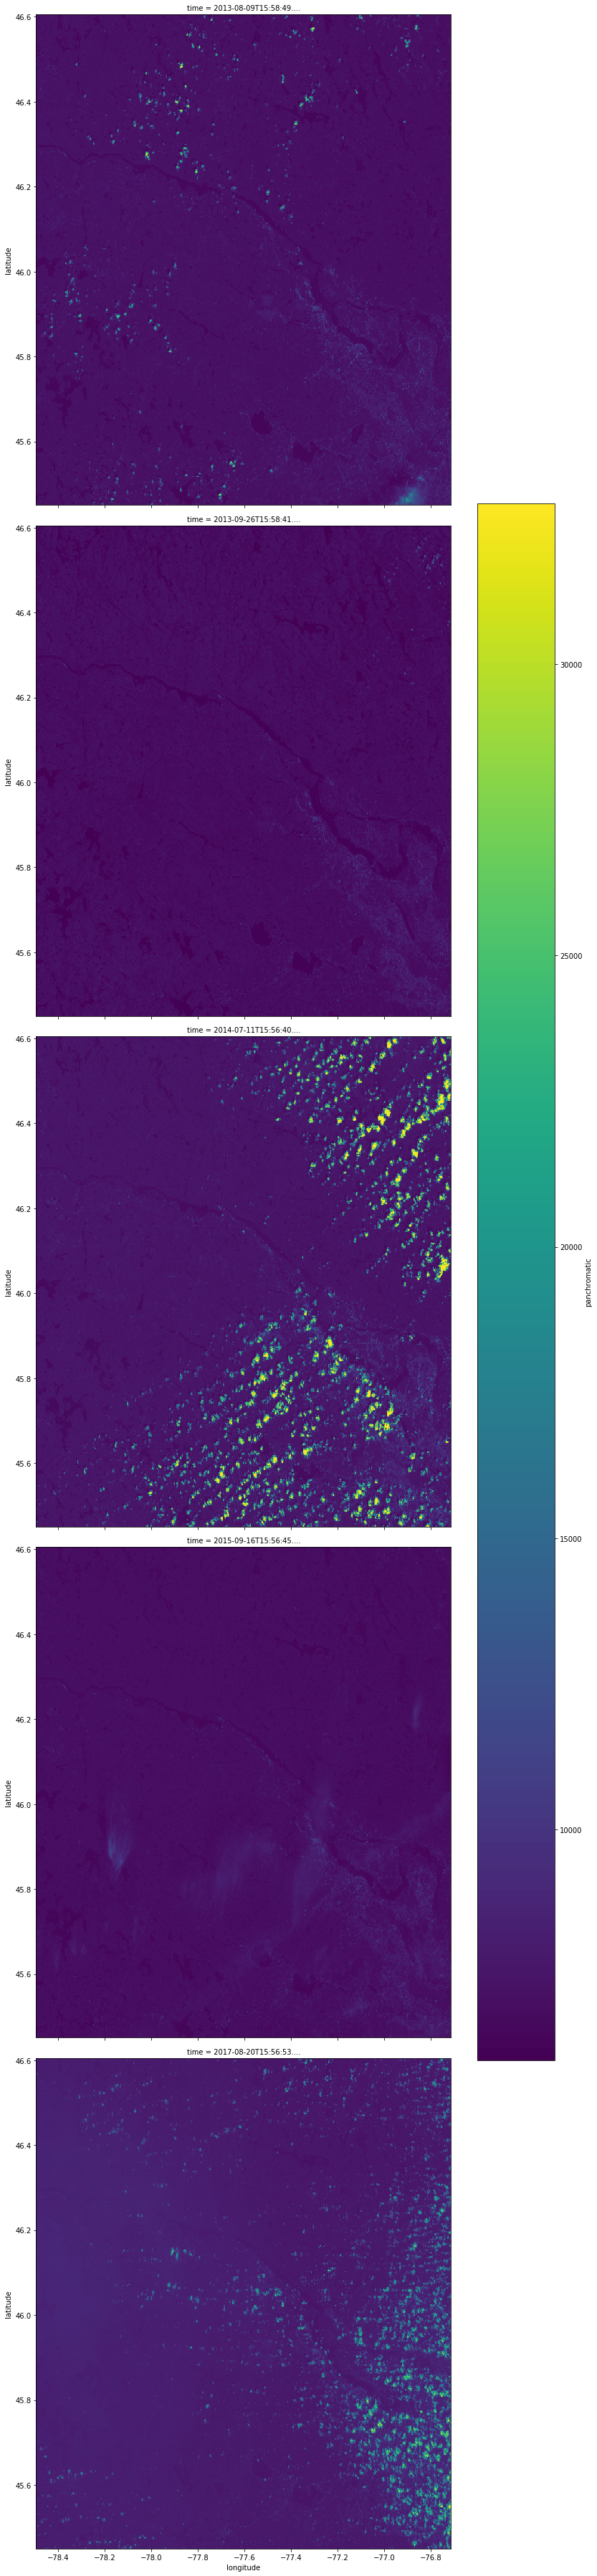

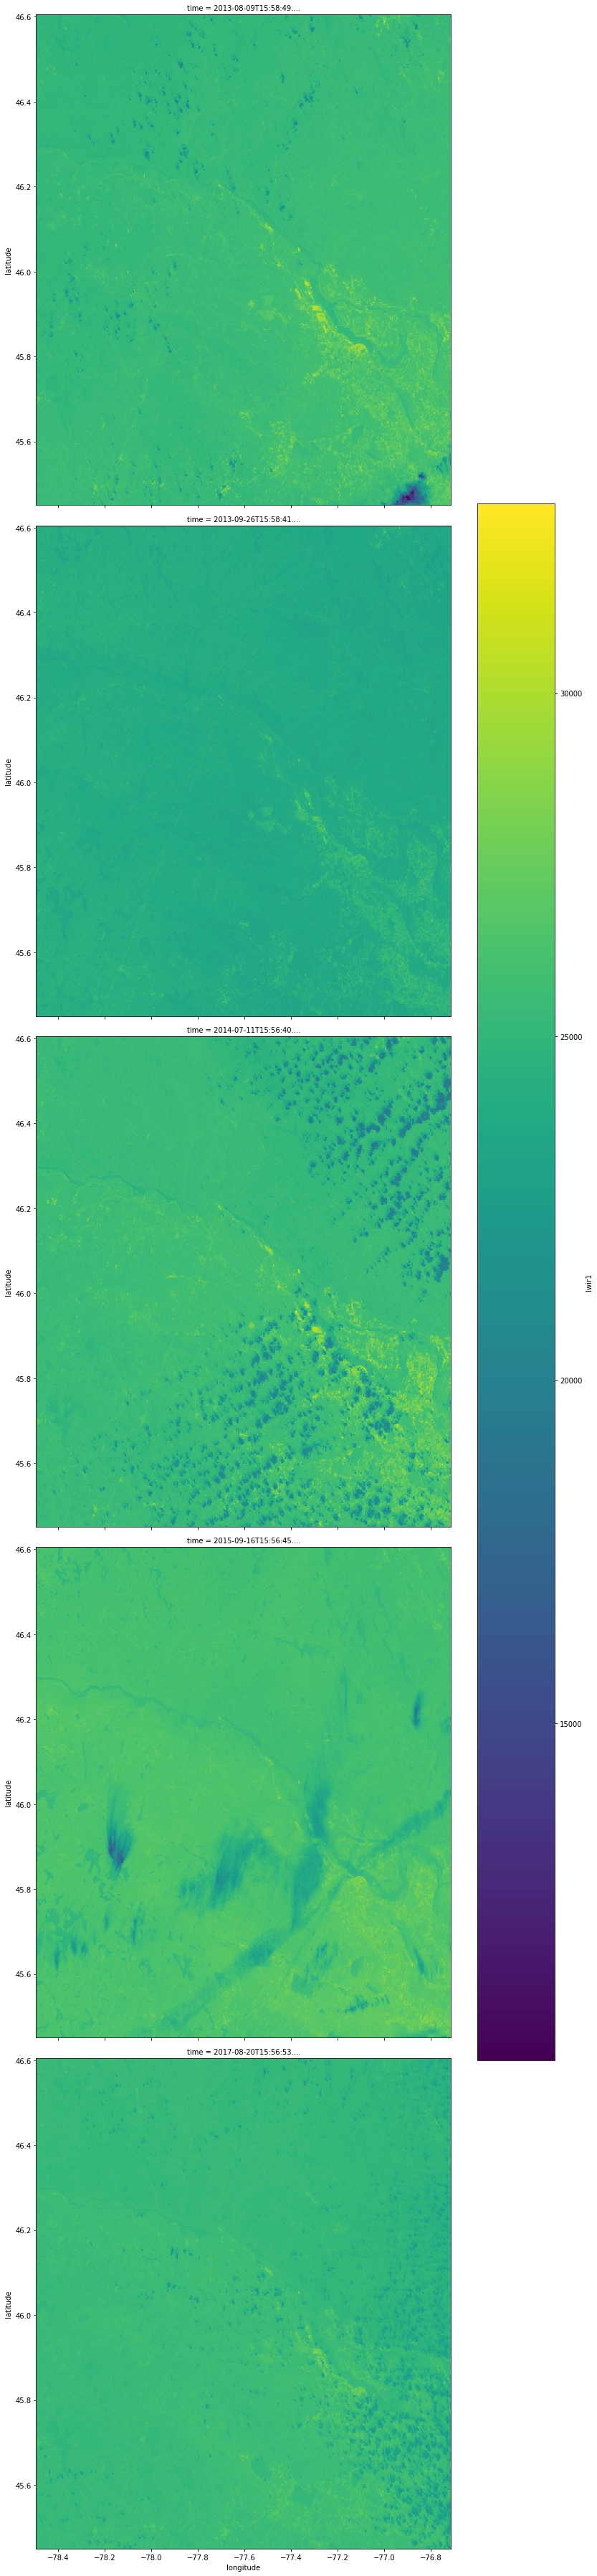

In [13]:
# Visualize band data

band1.plot(col='time', col_wrap = 1, size = 10)
band2.plot(col='time', col_wrap = 1, size = 10)

In [11]:
#Calculate and visualize the index
index = ((band1 - band2) / (band1 + band2))

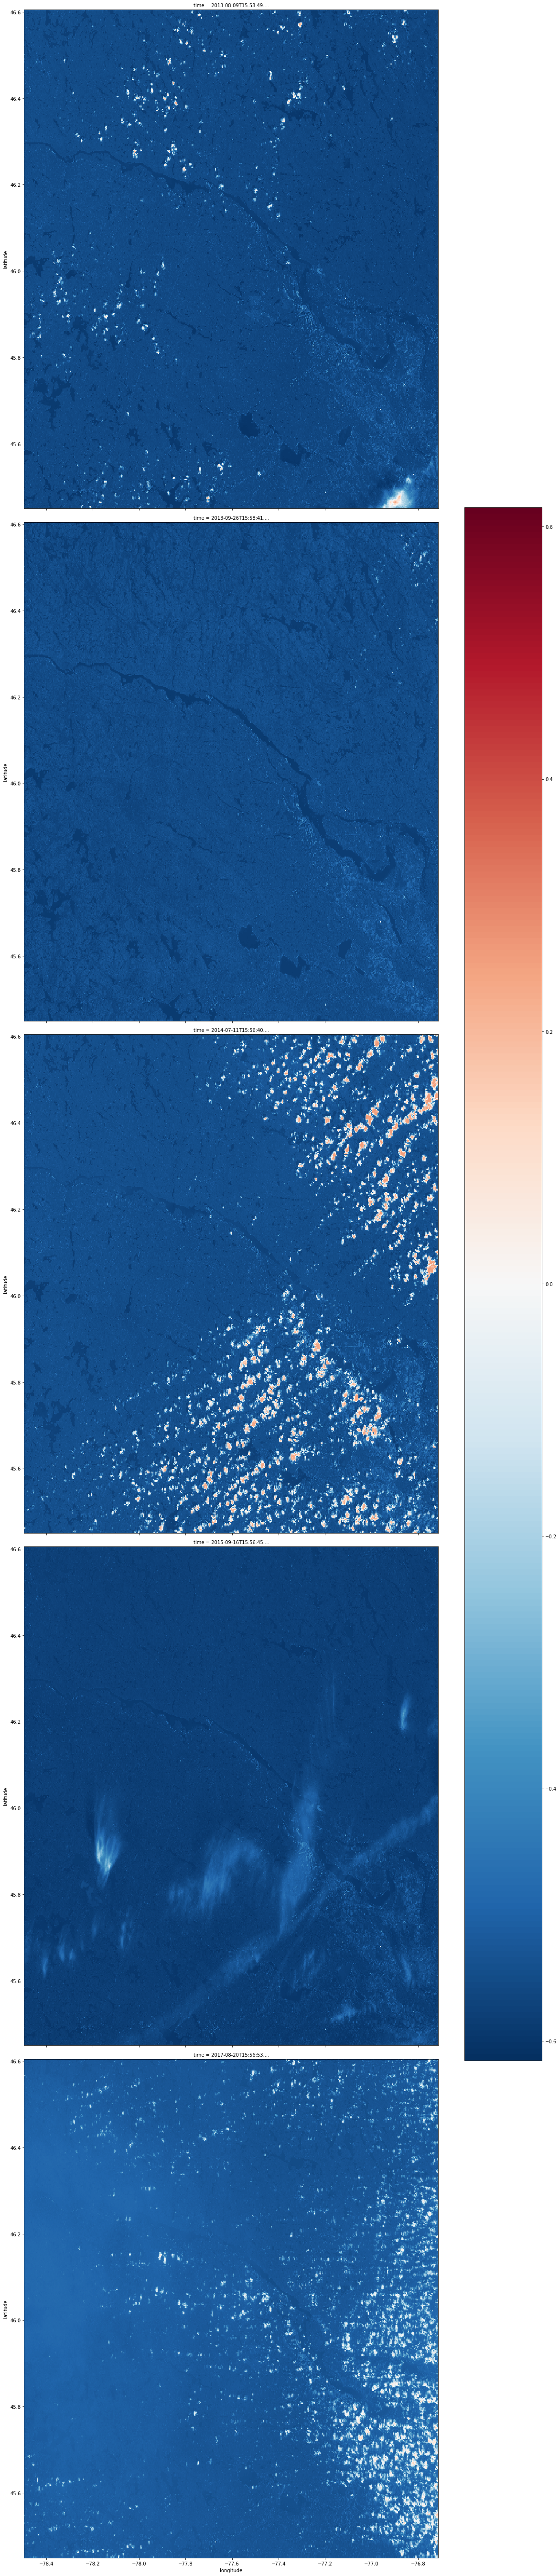

In [12]:
# preNDB2.plot(col='time', col_wrap = 1, size = 15)
# The data structure is an xarray, and borrows logic from Seaborn to infer what kind of color map to use.
# https://seaborn.pydata.org/tutorial/color_palettes.html

index.plot(col='time', col_wrap = 1, size = 15)